In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import cufflinks
pio.renderers.default = "jupyterlab"

sns.set_style('whitegrid')
plt.rc('axes', titlesize=18) 

In [28]:
df = pd.read_excel('D.xlsx', sheet_name="Sheet1")

In [29]:
df = df.transpose()

In [30]:
df.columns = df.loc['probe']

In [31]:
df = df.drop(labels='probe')

In [70]:
df = df.astype('float')

In [71]:
df.head()

probe,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,classe
S_ 1,5.303429,7.659399,3.170369,5.772055,9.738542,3.059167,3.475309,4.302587,2.570121,2.730286,...,6.050566,6.950719,6.547960,5.188016,3.249801,6.778044,6.822393,5.516231,6.913556,1.0
S_ 2,5.375203,7.774488,3.440088,5.709528,9.977348,3.079677,3.761084,4.806791,2.443754,2.693885,...,6.045622,7.332935,6.548315,5.425342,3.050121,6.781734,6.424443,5.587925,6.699748,-1.0
S_ 3,5.002917,7.472245,3.147841,5.757306,10.160930,3.008859,3.386601,4.470608,2.357630,2.817357,...,6.137849,6.924605,6.446913,5.213447,3.193598,7.020397,7.015004,5.907544,7.213468,1.0
S_ 4,4.855698,7.744349,3.234828,5.745567,10.174100,3.027464,3.206074,4.621721,2.295113,2.607828,...,6.372085,7.041561,6.306555,5.246610,3.099308,7.082721,6.827014,6.029452,7.398639,-1.0
S_ 5,4.790543,7.622976,3.296355,5.692692,9.545256,2.760207,3.054018,4.287441,2.451227,2.815971,...,6.883248,6.939386,6.085595,5.133538,3.063719,7.226849,6.086697,6.024281,7.442849,1.0


In [72]:
healthy = df[df['classe'] == -1]

In [73]:
sick = df[df['classe'] == 1]

In [272]:
n_df = healthy
n_df['index'] = healthy.index
n_df.reset_index()
n_df = pd.melt(n_df.drop('classe', axis=1), id_vars='index')

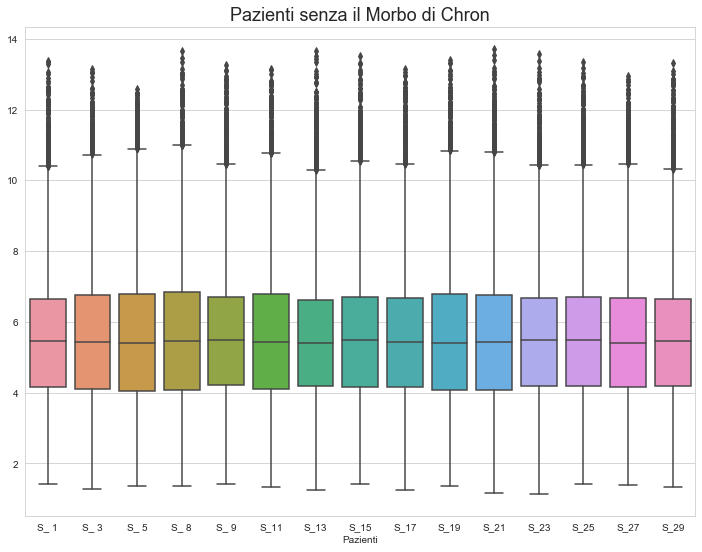

In [281]:
plt.figure(figsize=(12,9))
sns.boxplot(x="index", y="value", data=n_df)
plt.title('Pazienti senza il Morbo di Chron')
plt.xlabel('Pazienti')
plt.ylabel('')
plt.savefig('fig1.png')

In [274]:
n_df = sick
n_df['index'] = sick.index
n_df.reset_index()
n_df = pd.melt(n_df.drop('classe', axis=1), id_vars='index')

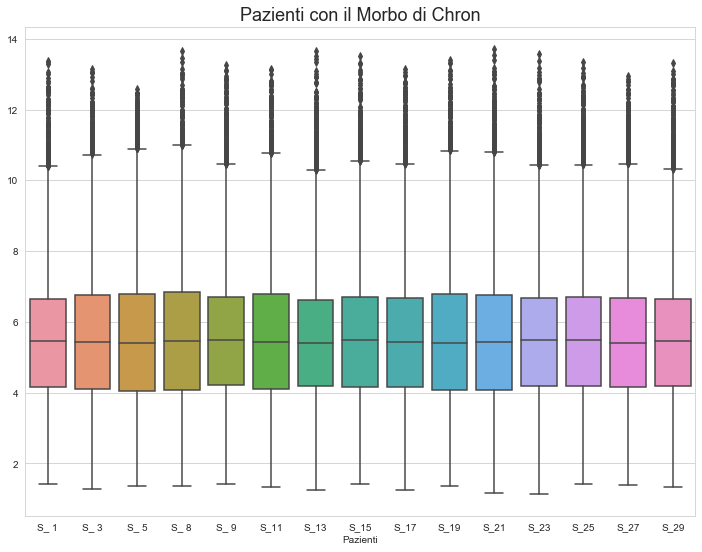

In [275]:
plt.figure(figsize=(12,9))
sns.boxplot(x="index", y="value", data=n_df)
plt.title('Pazienti con il Morbo di Chron')
plt.xlabel('Pazienti')
plt.ylabel('')
plt.savefig('fig2.png')

In [79]:
df.head()

probe,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,classe
S_ 1,5.303429,7.659399,3.170369,5.772055,9.738542,3.059167,3.475309,4.302587,2.570121,2.730286,...,6.050566,6.950719,6.547960,5.188016,3.249801,6.778044,6.822393,5.516231,6.913556,1.0
S_ 2,5.375203,7.774488,3.440088,5.709528,9.977348,3.079677,3.761084,4.806791,2.443754,2.693885,...,6.045622,7.332935,6.548315,5.425342,3.050121,6.781734,6.424443,5.587925,6.699748,-1.0
S_ 3,5.002917,7.472245,3.147841,5.757306,10.160930,3.008859,3.386601,4.470608,2.357630,2.817357,...,6.137849,6.924605,6.446913,5.213447,3.193598,7.020397,7.015004,5.907544,7.213468,1.0
S_ 4,4.855698,7.744349,3.234828,5.745567,10.174100,3.027464,3.206074,4.621721,2.295113,2.607828,...,6.372085,7.041561,6.306555,5.246610,3.099308,7.082721,6.827014,6.029452,7.398639,-1.0
S_ 5,4.790543,7.622976,3.296355,5.692692,9.545256,2.760207,3.054018,4.287441,2.451227,2.815971,...,6.883248,6.939386,6.085595,5.133538,3.063719,7.226849,6.086697,6.024281,7.442849,1.0


In [80]:
a = df['A1BG']
b = df['A1CF']

In [82]:
from scipy.stats import ttest_ind

In [83]:
ttest_ind(a, b)

Ttest_indResult(statistic=-15.258355272900623, pvalue=5.745018878325771e-22)

In [121]:
feat = df.columns[:-1]

In [129]:
vett = pd.DataFrame(columns=feat, index=('statistic', 'p-value'))

In [137]:
for i in feat:
        vett[i] = pd.DataFrame(ttest_ind(healthy[i], sick[i]))

In [140]:
vett

probe,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAA1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,-0.227195,2.356373,2.309973,0.807336,-1.122687,-1.340812,1.521251,-1.131566,-1.565903,-1.151876,...,-0.553986,-0.543867,-1.239724,0.118111,0.883886,-2.927812,1.740914,-2.306739,2.352196,0.354010
1,0.821923,0.025685,0.028477,0.426278,0.271106,0.190758,0.139411,0.267416,0.128605,0.259113,...,0.583986,0.590838,0.225368,0.906823,0.384284,0.006710,0.092679,0.028682,0.025925,0.725983


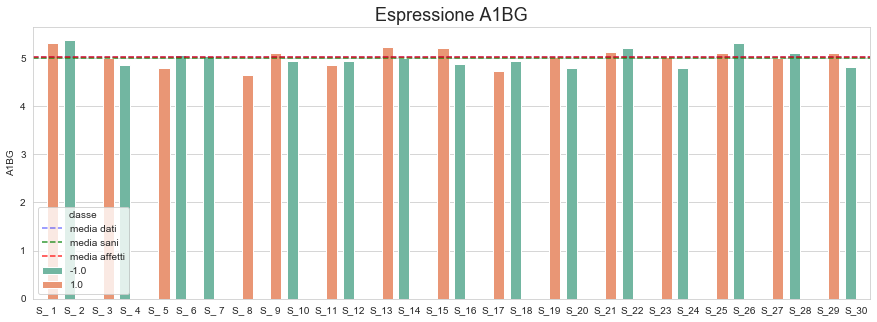

In [244]:
plt.figure(figsize=(15,5))
ax = plt.axes()

y = df['A1BG'].mean()
ax.axhline(y, 0, 30, color='blue', label="media dati", linestyle='dashed', alpha=0.5)
y_h = healthy['A1BG'].mean()
ax.axhline(y_h, 0, 30, color='green', label="media sani", linestyle='dashed', alpha=0.8)
y_s = sick['A1BG'].mean()
ax.axhline(y_s, 0, 30, color='red', label="media affetti", linestyle='dashed', alpha=0.8)

plt.title('Espressione A1BG')

sns.barplot(data=df, x=df.index, y='A1BG', hue='classe', ax=ax, palette='Set2')
plt.savefig('fig3.png')

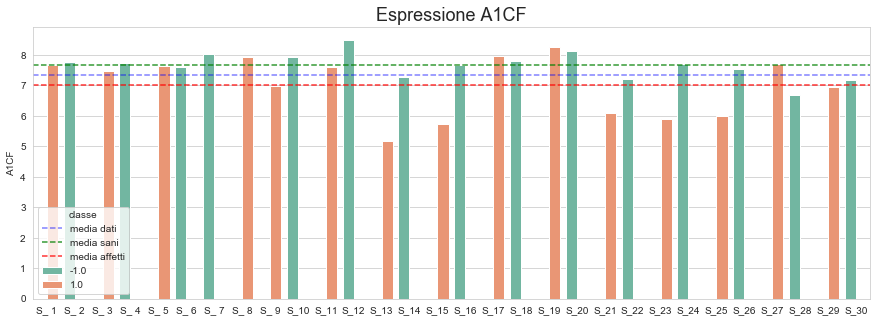

In [270]:
plt.figure(figsize=(15,5))
ax = plt.axes()

y = df['A1CF'].mean()
ax.axhline(y, 0, 30, color='blue', label="media dati", linestyle='dashed', alpha=0.5)
y_h = healthy['A1CF'].mean()
ax.axhline(y_h, 0, 30, color='green', label="media sani", linestyle='dashed', alpha=0.8)
y_s = sick['A1CF'].mean()
ax.axhline(y_s, 0, 30, color='red', label="media affetti", linestyle='dashed', alpha=0.8)

plt.title('Espressione A1CF')

sns.barplot(data=df, x=df.index, y='A1CF', hue='classe', ax=ax, palette='Set2')
plt.savefig('fig4.png')